# Tour on Scikit-Image



Images are represented in ``scikit-image`` using standard ``numpy`` arrays.  This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as ``matplotlib`` and ``scipy``.



### Numpy array acts as a container of multidimensional items

In [1]:
import numpy as np
arr = np.array([[3,2],[4,1]])
print(arr.shape) # List the dimension on each axis
print(arr.ndim) # print number of axes
print(arr.size) # print number of elements
print(arr.dtype)

(2, 2)
2
4
int64


### Numpy Array statistics

In [2]:
print(arr.min())
print(arr.max())
print(arr.mean())

1
4
2.5


### Selecting and Slicing Array
Interpret a gray scale image. scikit image has sample images shipped with module data

In [3]:
from skimage import data
# Read an image shipped with the package
coins = data.coins()

print('Type:', type(coins))
print('dtype:', coins.dtype)
print('shape:', coins.shape)
print('ndim:', coins.ndim)
print('size:', coins.size)

Type: <class 'numpy.ndarray'>
dtype: uint8
shape: (303, 384)
ndim: 2
size: 116352


In [0]:
#print(coins[0:2]) # Selects all items along row 0 and 1
print(coins[0,3]) # selects pixel at location (300,112)
print(coins[0:2, 1]) # selects items along 0 and 1 in column 1

129
[123 144]


### Display Images

matplotlib is the package used for rendering (or) displaying the images. To render the images directly in the jupyter notebook following command is used.
%matplotlib inline

pyplot module in matplotlib contains plotting and display utilities

In [0]:
%matplotlib inline
from matplotlib import pyplot as plt

### Grayscale image

(303, 384)
Values min/max: 1 252


(-0.5, 383.5, 302.5, -0.5)

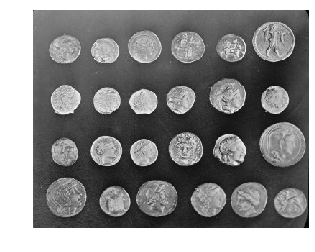

In [5]:
coin = data.coins()
print(coin.shape)
print("Values min/max:", coin.min(), coin.max())
plt.imshow(coin, cmap='gray')
plt.axis("off")

### Color Image (RGB image)

Shape: (300, 451, 3)
Values min/max: 0 231


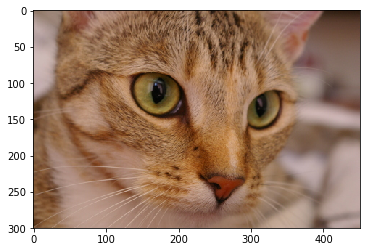

In [6]:
cat = data.chelsea()
print("Shape:", cat.shape)
print("Values min/max:", cat.min(), cat.max())

plt.imshow(cat);

### Basic plotting utilities

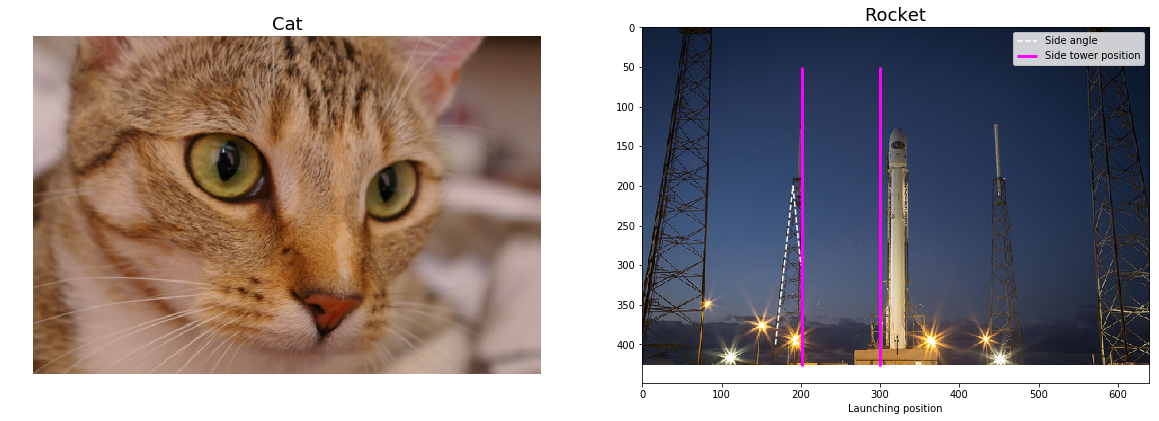

In [0]:
from skimage import data
import matplotlib.pyplot as plt

img0 = data.chelsea()
img1 = data.rocket()

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10))

ax0.imshow(img0)
ax0.set_title('Cat', fontsize=18)
ax0.axis('off')

ax1.imshow(img1)
ax1.set_title('Rocket', fontsize=18)
ax1.set_xlabel('Launching position')

# Draw vertical lines
# second parameter - ymin

ax1.vlines([202, 300], 50, img1.shape[0], colors='magenta', linewidth=3, label='Side tower position')

# List 1- set of x coordinates
# List 2 - set of corresponding y coordinates
ax1.plot([168, 190, 200], [400, 200, 300], color='white', linestyle='--', label='Side angle')

ax1.legend();

### Data types and image values

In literature, one finds different conventions for representing image values:

```
  0 - 255   where  0 is black, 255 is white
  0 - 1     where  0 is black, 1 is white
```

``scikit-image`` supports both conventions--the choice is determined by the
data-type of the array.


You can convert images between different representations by using ``img_as_float``, ``img_as_ubyte``, etc.
``scikit-image`` mostly uses the floating point format internally.

uint8
type, min, max: uint8 0 231
type, min, max: float64 0.0 0.9058823529411765

231/255 = 0.9058823529411765


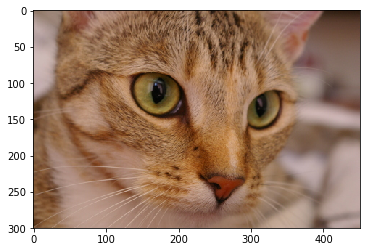

In [0]:
from skimage import img_as_float, img_as_ubyte

image = data.chelsea()
print(image.dtype)

image_ubyte = img_as_ubyte(image)
image_float = img_as_float(image)

print("type, min, max:", image_ubyte.dtype, image_ubyte.min(), image_ubyte.max())
print("type, min, max:", image_float.dtype, image_float.min(), image_float.max())
print()
print("231/255 =", 231/255.)
plt.imshow(image)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
!ls
!cd /content/drive/


drive  sample_data


## Image I/O

scikit-image provides `io` submodule for reading images externally. It supports all types of image formats (JPEG (or) PNG)

<class 'numpy.ndarray'>
uint8
(300, 225, 3)
0 255


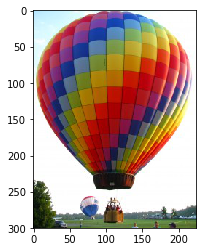

In [11]:
from skimage import io

image = io.imread('/content/drive/My Drive/Pres_28.8.2019/images/balloon.jpg')

print(type(image))
print(image.dtype)
print(image.shape)
print(image.min(), image.max())

plt.imshow(image);

## <span class="exercize">Exercise: visualizing RGB channels</span>

Display the different color channels of the image along (each as a gray-scale image).  Start with the following template:

In [0]:
# --- read in the image ---

image = plt.imread('../images/Bells-Beach.jpg')

# --- assign each color channel to a different variable ---

r = #--
g = #--
b = #--

# --- display the image and r, g, b channels ---

f, axes = plt.subplots(1, 4, figsize=(16, 5))

for ax in axes:
    ax.axis('off')

(ax_r, ax_g, ax_b, ax_color) = axes
    
ax_r.imshow(r, cmap='gray')
ax_r.set_title('red channel')

ax_g.imshow(g, cmap='gray')
ax_g.set_title('green channel')

ax_b.imshow(b, cmap='gray')
ax_b.set_title('blue channel')

# --- Here, we stack the R, G, and B layers again
#     to form a color image ---
ax_color.imshow(np.stack([r, g, b], axis=2))
ax_color.set_title('all channels');